<a href="https://colab.research.google.com/github/Ajay-Ravikumarrajan/Machine_Learning/blob/main/Logistic_Regression/Logistic_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [ ]:
data = pd.read_csv("/content/diabetes.csv")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
feature_cols=['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x=data[feature_cols][1:] # Exclude the header row
y=data.Outcome[1:] # Exclude the header row

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(613, 7)

(613,)

(154, 7)

(154,)

In [ ]:
model=LogisticRegression(solver='lbfgs', max_iter=1000)

In [ ]:
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [ ]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy_Score: ', Accuracy_score)
print('Accuracy in percentage: ',int(Accuracy_score*100),'%')

Confusion Matrix:  [[85  9]
 [25 35]]
Accuracy_Score:  0.7792207792207793
Accuracy in percentage:  77 %


<Axes: xlabel='Predicted', ylabel='Actual'>

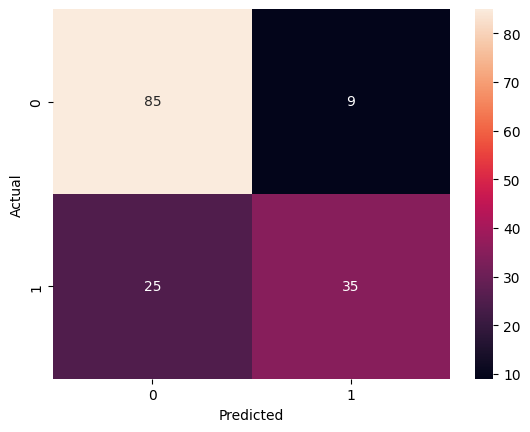

In [ ]:
conf_mat=pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)